## Logistic Regression Example 

This is an example of a logistic regression model in Python with the scikit-learn module. The Logistic Regression technique is used for classification tasks in which we try to find binary outcomes. 
This type of outcomes describe if a certain event happens or not, as an example: if a student fails a course or not. The input variables that are taken into account for this type of problems can be either continuous. For the student failing example a continuous variable would be its grade for a previous course and a discrete value would be the number of absences it has. 
For this type of data for the input and output it is useful to use the probabilities of each variable (or event) happening. Our objective will then be to find the conditional probability of the output (Y) given a certain feature vector of inputs (X). Such probability is noted as: Pr(Y|X). The output is a binary variable that will take the value of 1 if the event happens (ex. the student failed the course) and the value of 0 if it does not (ex. the student did not fail the course). The vector X is a feature vector that describes the characteristics of the input. 
 There are many methods to estimate value of a conditional probability and one of the most used for classification tasks is Logistical Regression (LogR). LogR models the conditional probability Pr(Y=1|X=x) as a function of x: p(x). All the unknown parameters will be estimated with maximum likelihood which is a method that selects the set of values of the model parameters that maximizes the likelihood function: 
$$L(\beta_0,\beta) = \prod_{i=1}^{n}p(x_i)^{y_i}(1-p(x_i))^{1-y_i}$$
The maximization of this function is done by obtaining the logarithm of the function, differentiate with respect to the parameters and equal to zero to solve. 
When we train a classifier of this kind we feed the training data-points with its feature vector $x_i$ and its observed class $y_i$. The model uses this information to compute the probability distribution that defines the likelihood function. 
The Scikit-learn module enables us to use the LogR model by using the function LinearRegression() with our data set. 
We will show an example of the implementation of this model to analyze a database of student performance. The data describes different attributes of the students such as grades, demographic, social and school related features. Our objective will be to determine the probability of a student failing given its characteristic attributes.  


## Dataset

The dataset we will use is the Student Performance Data Set (http://archive.ics.uci.edu/ml/datasets/Student+Performance) from the UCI Machine Learning repository(http://archive.ics.uci.edu/ml/index.html). It describes student achievement in secondary education of two schools in Portugal. We will focus on the performance in the subject of Mathematics. 


### Description of Variables

The dataset contains 649 observations and we will use 14 variables:
1.	sex - student's sex (binary: 'F' - female or 'M' - male) 
2.	age - student's age (numeric: from 15 to 22) 
3.	address - student's home address type (binary: 'U' - urban or 'R' - rural) 
4.	Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
5.	traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
6.	studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
7.	failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
8.	famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
9.	freetime - free time after school (numeric: from 1 - very low to 5 - very high)
10.	goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
11.	Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
12.	Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
13.	absences - number of school absences (numeric: from 0 to 93)
14.	G3 - final grade (numeric: from 0 to 20, output target)


## Problem Statement

In order to use this dataset for a classification problem I created a new binary variable: fail. I considered that a failing grade would be below a score of 12 so for all the grades (G3) that are below this grade will recieve a 1 in the fail variable and a 0 if it is above it. Our objective will then be to predict the classification for each student.


## Import modules

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

## Data Pre-Processing

To load the data set we use ps.read_csv to read a file in this format. To use this function we first write the address of the location of the data, then the symbol used for separation (;) and finally the columns we want to select from the dataset since I decided not to use all the available information from the original dataset for this problem. We do this by using the command ‘usecols’ and writing the index of the columns I wanted to use.
 Notice that the first column of the data set contains the names of each column and we will be able to make reference to each column by its name (for example: data.age)

In [35]:
#Load the data base using only the columns we need: pc_price, pc_volume, daysto_nd, return_nd
#data = pd.read_csv('C:\Users\Gabriela Sandoval\Documents\IPython Notebooks\student-mat.csv',sep =(';'), usecols=[1,2,3,5,12,13,14,23,24,25,26,27,29,32])
#(http://archive.ics.uci.edu/ml/datasets/Student+Performance
data = pd.read_csv('student-mat.csv',sep =(';'), usecols=[1,2,3,5,12,13,14,23,24,25,26,27,29,32])
#(http://archive.ics.uci.edu/ml/datasets/Student+Performance
data[:3]

,sex,age,address,Pstatus,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G3
0,F,18,U,A,2,2,0,4,3,4,1,1,6,6
1,F,17,U,T,1,2,0,5,3,3,1,1,4,6
2,F,15,U,T,1,2,3,4,3,2,2,3,10,10


To add the column for the new binary variable we select to have the value of 1 if the value of the column G3 is below 12. 

In [36]:
# Add "fail" column: 1 represents failing, 0 represents not failing
data['fail'] = (data.G3 < 12).astype(int)
data[:3]

,sex,age,address,Pstatus,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G3,fail
0,F,18,U,A,2,2,0,4,3,4,1,1,6,6,1
1,F,17,U,T,1,2,0,5,3,3,1,1,4,6,1
2,F,15,U,T,1,2,3,4,3,2,2,3,10,10,1


## Data Exploration

In [37]:
data.groupby('fail').mean()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G3
fail,,,,,,,,,,,
0,16.481481,1.358025,2.104938,0.104938,3.956790,3.259259,2.938272,1.413580,2.129630,4.635802,14.425926
1,16.845494,1.510730,1.987124,0.493562,3.935622,3.218884,3.227468,1.527897,2.403433,6.454936,7.626609


We can display the first three rows of our database:

In [38]:
data[:3]

,sex,age,address,Pstatus,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G3,fail
0,F,18,U,A,2,2,0,4,3,4,1,1,6,6,1
1,F,17,U,T,1,2,0,5,3,3,1,1,4,6,1
2,F,15,U,T,1,2,3,4,3,2,2,3,10,10,1


We can view our database grouped by the failures and the means for the other variables. 

In [39]:
data.groupby('fail').mean()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G3
fail,,,,,,,,,,,
0,16.481481,1.358025,2.104938,0.104938,3.956790,3.259259,2.938272,1.413580,2.129630,4.635802,14.425926
1,16.845494,1.510730,1.987124,0.493562,3.935622,3.218884,3.227468,1.527897,2.403433,6.454936,7.626609


## Data Visualization

show plots in the notebook

In [40]:
%matplotlib inline

We can visualize the histograms of Age and Workday Alcohol Consumption

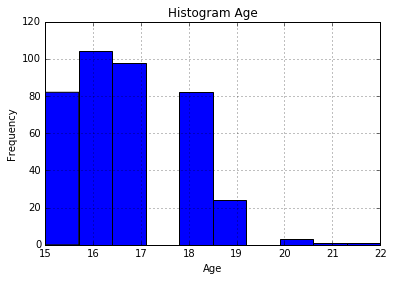

In [41]:

# histogram of Age
data.age.hist()
plt.title('Histogram Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

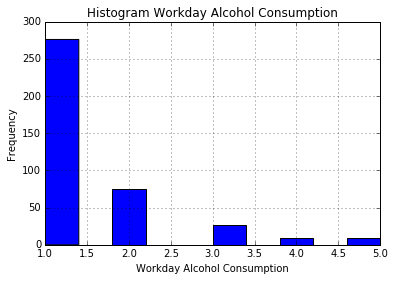

In [42]:
# histogram of Dalc
data.Dalc.hist()
plt.title('Histogram Workday Alcohol Consumption')
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Frequency')

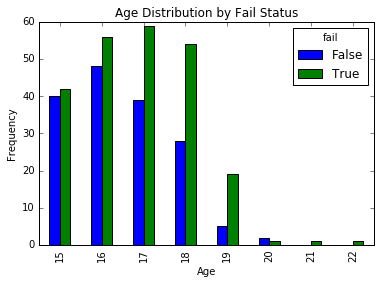

In [43]:
# barplot of age grouped by affair (True or False)
pd.crosstab(data.age, data.fail.astype(bool)).plot(kind='bar')
plt.title('Age Distribution by Fail Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

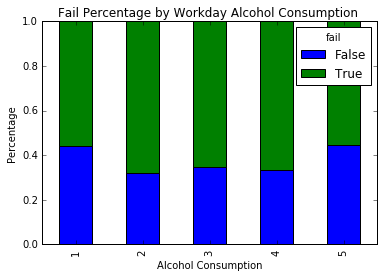

In [44]:
#Stacked barplot to look at the percentage of students failing by weekday alcohol consumption.

fail_Dalc = pd.crosstab(data.Dalc, data.fail.astype(bool))
fail_Dalc.div(fail_Dalc.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fail Percentage by Workday Alcohol Consumption ')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Percentage')

## Prepare Data for Logistic Regression

To prepare the data, I added an intercept column as well as dummy variables for sex, address, Pstatus and studytime, because they are categorial variables. For this I use the dmatrices function from the patsy module.


In [45]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
#y, X = dmatrices('fail ~  Dalc + Walc + absences',data, return_type="dataframe")
y, X = dmatrices('fail ~  C(sex) + age + C(address) + C(Pstatus) + traveltime \
                        +C(studytime) + failures + freetime + goout + Dalc + Walc + absences',data, return_type="dataframe")

print (X.columns)

Index([u'Intercept', u'C(sex)[T.M]', u'C(address)[T.U]', u'C(Pstatus)[T.T]',
       u'C(studytime)[T.2]', u'C(studytime)[T.3]', u'C(studytime)[T.4]',
       u'age', u'traveltime', u'failures', u'freetime', u'goout', u'Dalc',
       u'Walc', u'absences'],
      dtype='object')


We also need to flatten y into a 1-D array, so that scikit-learn will properly understand it as the response variable.

In [46]:
# flatten y into a 1-D array
y = np.ravel(y)

## Logistic Regression

We run a logistic regression on the entire data set and test how accurate it is. 
Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!


In [47]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.65316455696202536

To compute the null error rate: 

In [48]:
# what percentage had affairs?
y.mean()

0.58987341772151902

Let's examine the coefficients to see what we learn.

In [49]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-0.286420110125]
1,C(sex)[T.M],[-0.618362988883]
2,C(address)[T.U],[-0.409761496105]
3,C(Pstatus)[T.T],[0.12059034248]
4,C(studytime)[T.2],[0.305077596296]
5,C(studytime)[T.3],[-0.369179708167]
6,C(studytime)[T.4],[-0.175597344827]
7,age,[0.0215476805789]
8,traveltime,[0.201185849377]
9,failures,[0.93183497283]


## Model Evaluation Using a Validation Set

So far, we have trained and tested on the same set. Let's instead split the data into a training set and a testing set.


In [50]:
#Model Evaluation Using a Validation Set
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We now need to predict class labels for the test set. We will also generate the class probabilities, just to take a look.

In [51]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print (predicted)

[ 0.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.
  1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.
  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  1.
  0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.
  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.
  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.]


In [52]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs)

[[ 0.57951509  0.42048491]
 [ 0.50216235  0.49783765]
 [ 0.57802364  0.42197636]
 [ 0.31993524  0.68006476]
 [ 0.39025624  0.60974376]
 [ 0.63533307  0.36466693]
 [ 0.36413799  0.63586201]
 [ 0.27902769  0.72097231]
 [ 0.54647523  0.45352477]
 [ 0.6142033   0.3857967 ]
 [ 0.32359631  0.67640369]
 [ 0.17170473  0.82829527]
 [ 0.72443105  0.27556895]
 [ 0.59066382  0.40933618]
 [ 0.33354211  0.66645789]
 [ 0.6418493   0.3581507 ]
 [ 0.40422379  0.59577621]
 [ 0.64760397  0.35239603]
 [ 0.44866206  0.55133794]
 [ 0.40166485  0.59833515]
 [ 0.33798707  0.66201293]
 [ 0.12787262  0.87212738]
 [ 0.67628326  0.32371674]
 [ 0.52031481  0.47968519]
 [ 0.38722049  0.61277951]
 [ 0.57248573  0.42751427]
 [ 0.22748797  0.77251203]
 [ 0.6799977   0.3200023 ]
 [ 0.70635935  0.29364065]
 [ 0.6426705   0.3573295 ]
 [ 0.15285829  0.84714171]
 [ 0.17382958  0.82617042]
 [ 0.74103607  0.25896393]
 [ 0.08516218  0.91483782]
 [ 0.51538439  0.48461561]
 [ 0.1633932   0.8366068 ]
 [ 0.45563022  0.54436978]
 

Now we generate some evaluation metrics.

In [53]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))

0.621848739496


In [54]:
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.642342342342


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.
We can also see the confusion matrix and a classification report with other metrics.


In [55]:
print (metrics.confusion_matrix(y_test, predicted))

[[24 21]
 [24 50]]


In [56]:
print (metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

        0.0       0.50      0.53      0.52        45
        1.0       0.70      0.68      0.69        74

avg / total       0.63      0.62      0.62       119



## Model Evaluation Using Cross-Validation

Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.


In [57]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)

[ 0.70731707  0.63414634  0.65        0.66666667  0.53846154  0.48717949
  0.66666667  0.64102564  0.58974359  0.56410256]


In [58]:
print (scores.mean())

0.614530956848


Looks good. It's still performing at 73% accuracy.

## Predicting the Probability of an Affair

We can predict the probability of failing for a random student not present in the data set. 


In [59]:
# Predict the probability of a student failing : 2nd value 
model.predict_proba(np.array([1,1,1,1,1,0,0,22,2,3,3,3,4,3,5]))

C:\Users\k43e-msr1-red-r\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.04995553,  0.95004447]])